### sklearn.model_selection.StratifiedKFold

- class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)


In [40]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [41]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label']= iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [42]:
kfold = KFold(n_splits=5)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
0    20
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    30
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
2    50
1    40
0    30
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    20
1    10
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
2    50
1    20
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    30
Name: count, dtype: int64
## 교차 검증: 4
학습 레이블 데이터 분포:
 label
0    50
1    40
2    30
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    20
1    10
Name: count, dtype: int64
## 교차 검증: 5
학습 레이블 데이터 분포:
 label
0    50
1    50
2    20
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    30
Name: count, dtype: int64


In [43]:
skf = StratifiedKFold(n_splits=3)
n_iter=0
for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [44]:
dt_clf = DecisionTreeClassifier(random_state=11)
features = iris.data
label = iris.target
n_liter =0

kfold = KFold(n_splits=3)
cv_accuracy=[]
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_liter += 1
    accuracy = np.round(accuracy_score(y_test , pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도:{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_liter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_liter, test_index))
    cv_accuracy.append(accuracy)
print('\n## 평균검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도:0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

#2 교차 검증 정확도:0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

#3 교차 검증 정확도:0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균검증 정확도: 0.0


In [45]:
cv_accuracy=[]
for train_index, test_index in skf.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_liter += 1
    accuracy = np.round(accuracy_score(y_test , pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도:{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_liter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_liter, test_index))
    cv_accuracy.append(accuracy)
print('\n## 평균검증 정확도:', np.mean(cv_accuracy))


#4 교차 검증 정확도:0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#4 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#5 교차 검증 정확도:0.92, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#5 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#6 교차 검증 정확도:0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#6 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균검증 정확도: 0.96


In [46]:
from sklearn.model_selection import cross_val_score, cross_validate

In [47]:
iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy',cv=5)
print('교차 검중별 정확도',np.round(scores,4))
print('평균 검증 정확도',np.round(np.mean(scores)))

교차 검중별 정확도 [0.9667 0.9667 0.9    0.9667 1.    ]
평균 검증 정확도 1.0


### sklearn.model_selection.GridSearchCV
 - class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.2, random_state=121)

dtree=DecisionTreeClassifier(random_state=12)
### parameter 들을 dic형태로 설정
parameters= {'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [50]:
# param_grid의 하이퍼 파라미터들을 3래의 train,test set fold로 나눠서 테서트 수행 설정
### refit =True 가 default . True면 가장 좋은 파라미터 설정으로 재 학습 시킴

grid_dtree= GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 불꽃 train 데이터로 param_gfid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train,y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score','rank_test_score',"split0_test_score","split1_test_score",'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


### sklearn.preprocessing.LabelEncoder
- class sklearn.preprocessing.LabelEncoder
fit(y)	                    Fit label encoder.
fit_transform(y)	        Fit label encoder and return encoded labels.
get_params([deep])	        Get parameters for this estimator.
inverse_transform(y)	    Transform labels back to original encoding.
set_output(*[, transform])	Set output container.
set_params(**params)	    Set the parameters of this estimator.
transform(y)	            Transform labels to normalized encoding.

In [51]:
from sklearn.preprocessing import LabelEncoder
items =['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
# 문자를 숫자로 바꿀때 사용
# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 label 인코딩 수행.
encoder= LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:' , labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [52]:
# 디코딩
encoder.inverse_transform(labels)

array(['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서'], dtype='<U4')

In [53]:
print('인코딩 클래스', encoder.classes_)

인코딩 클래스 ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [54]:
print('디코딩 원본 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


### sklearn.preprocessing.OneHotEncoder
- class sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse='deprecated', sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None)

In [55]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items =['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
data = np.array(items).reshape(1,-1)
ohe = OneHotEncoder()

result = ohe.fit_transform(data)
result.toarray()

array([[1., 1., 1., 1., 1., 1., 1., 1.]])

In [56]:
import pandas as pd
items =['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
pd.DataFrame('')
pd.get_dummies(items)

ValueError: DataFrame constructor not properly called!

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris=load_iris()
iris_data=iris.data
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)


features=iris.data
label =iris.target

# StandardScaler 객체 생성
scaler=StandardScaler()
# StrandardScaler로 데이터 셋 변환,fit() transform() 호출
scaler.fit(iris_df)
iris_scaled =scaler.transform(iris_df)

# trasform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled =pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('feature 들의 분산 값')
print(iris_df_scaled.var())

In [ ]:
! pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv("../Datasets/titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [58]:
gender = pd.read_csv("../Datasets/titanic_gender_submission.csv")

In [ ]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace = True)
titanic_df["Cabin"].fillna("N", inplace = True)
titanic_df["Embarked"].fillna("N", inplace = True)
print("데이터 세트 Null 값 갯수 ", titanic_df.isnull().sum().sum())

In [60]:
print("데이터 세트 Null 값 갯수 ", titanic_df.isnull().sum())

데이터 세트 Null 값 갯수  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [61]:

print(" Sex 값 분포 : \n", titanic_df["Sex"].value_counts())
print("\n Cabin 값 분포 :\n", titanic_df["Cabin"].value_counts())
print("\n Embarked 값 분포 :\n", titanic_df["Embarked"].value_counts())

 Sex 값 분포 : 
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [62]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
print(titanic_df["Cabin"].head(3))

0    NaN
1      C
2    NaN
Name: Cabin, dtype: object


In [69]:
titanic_df["Cabin"].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [65]:
titanic_df.groupby(["Sex",'Survived'])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

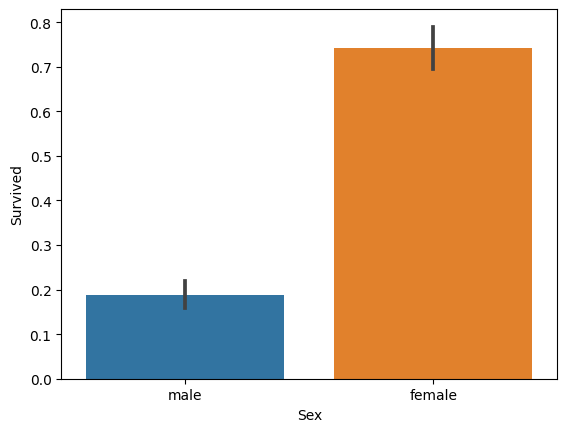

In [66]:
sns.barplot(x = "Sex", y = "Survived", data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

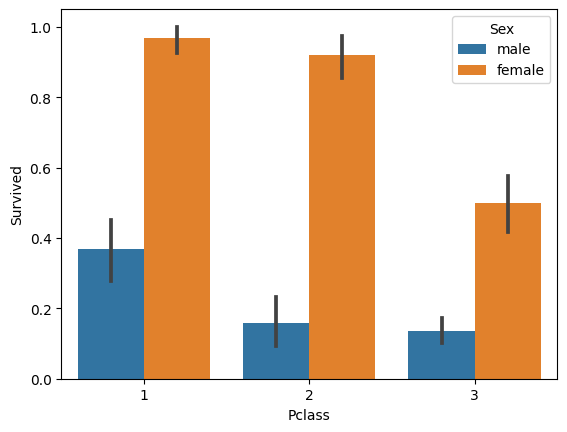

In [67]:
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = titanic_df)

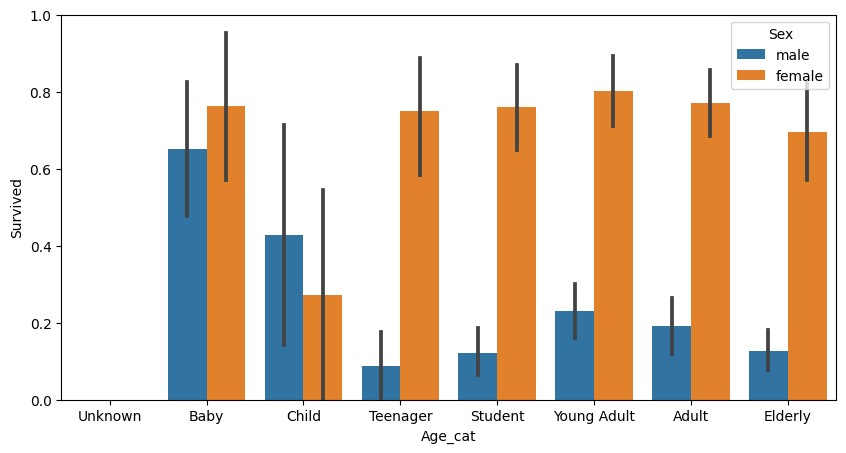

In [68]:
import matplotlib.pyplot as plt
def get_category(age):
    cat=''
    if age <= -1: 
        cat='Unknown' 
    elif age <=5:
        cat='Baby'
    elif age <=12:
        cat='Child'
    elif age <=18:
        cat='Teenager'
    elif age <=25:
        cat='Student'
    elif age <=35:
        cat='Young Adult'
    elif age <=60:
        cat='Adult'
    else:
        cat='Elderly'

    return cat

plt.figure(figsize=(10,5))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x :get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("평균 정확도: {0:.4f}".format(np.mean(scores)))
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)
print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

NameError: name 'X_titanic_df' is not defined